<a href="https://colab.research.google.com/github/partha1189/machine_learning/blob/tf_2.0_practice/CNN_Horse_VS_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-09-17 09:22:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.15.128, 173.194.76.128, 64.233.184.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.15.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  32.5MB/s    in 4.4s    

2020-09-17 09:22:33 (32.5 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-09-17 09:22:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.166.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.166.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  43.3MB/s    in 0.3s    

2020-09-17 09:22:34 (43.3 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
!ls -l /tmp

total 157288
-rw-r--r-- 1 root root 149574867 Feb 11  2019 horse-or-human.zip
-rw-r--r-- 1 root root  11480187 Feb 11  2019 validation-horse-or-human.zip


In [4]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [5]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_horse_names[:10])

['horse44-6.png', 'horse47-9.png', 'horse27-8.png', 'horse09-6.png', 'horse49-4.png', 'horse09-4.png', 'horse42-5.png', 'horse49-1.png', 'horse46-0.png', 'horse27-7.png']
['human04-00.png', 'human13-02.png', 'human03-04.png', 'human04-06.png', 'human07-12.png', 'human14-25.png', 'human04-15.png', 'human13-08.png', 'human08-15.png', 'human08-19.png']
['horse2-011.png', 'horse4-188.png', 'horse1-000.png', 'horse1-510.png', 'horse3-326.png', 'horse5-103.png', 'horse5-402.png', 'horse1-122.png', 'horse5-342.png', 'horse4-202.png']
['horse2-011.png', 'horse4-188.png', 'horse1-000.png', 'horse1-510.png', 'horse3-326.png', 'horse5-103.png', 'horse5-402.png', 'horse1-122.png', 'horse5-342.png', 'horse4-202.png']


In [7]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

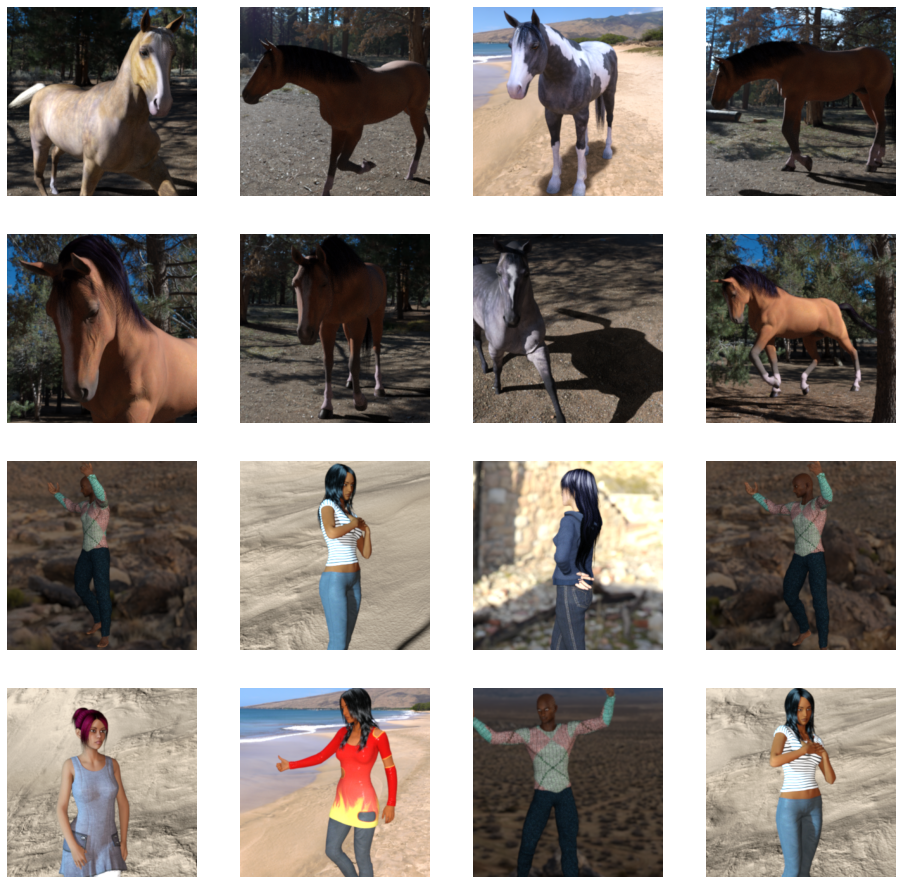

In [9]:
fig = plt.gcf()  #get current figure
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index - 8 :pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index - 8 :pic_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
   tf.keras.layers.MaxPool2D(2, 2),
   tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(2, 2),   
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(2, 2),   
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(2, 2),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(2, 2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')                                     
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [17]:
train_generator = train_datagen.flow_from_directory(
                      '/tmp/horse-or-human/',
                      target_size = (300, 300),
                      batch_size = 128,
                      class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
                      '/tmp/validation-horse-or-human/',
                      target_size = (300, 300),
                      batch_size = 32,
                      class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [18]:
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1,
                    validation_data= validation_generator,
                    validation_steps = 8)

Epoch 1/15
8/8 [==============================] - 8s 967ms/step - loss: 0.9498 - accuracy: 0.5228 - val_loss: 0.6498 - val_accuracy: 0.6680
Epoch 2/15
8/8 [==============================] - 8s 982ms/step - loss: 0.7278 - accuracy: 0.7564 - val_loss: 0.4015 - val_accuracy: 0.8320
Epoch 3/15
8/8 [==============================] - 8s 1s/step - loss: 0.5174 - accuracy: 0.7930 - val_loss: 0.9429 - val_accuracy: 0.7070
Epoch 4/15
8/8 [==============================] - 8s 962ms/step - loss: 0.4155 - accuracy: 0.8409 - val_loss: 0.5354 - val_accuracy: 0.8555
Epoch 5/15
8/8 [==============================] - 8s 986ms/step - loss: 0.3393 - accuracy: 0.8854 - val_loss: 2.0690 - val_accuracy: 0.6562
Epoch 6/15
8/8 [==============================] - 8s 982ms/step - loss: 0.4164 - accuracy: 0.8420 - val_loss: 1.3906 - val_accuracy: 0.7539
Epoch 7/15
8/8 [==============================] - 8s 963ms/step - loss: 0.1005 - accuracy: 0.9677 - val_loss: 0.9445 - val_accuracy: 0.8672
Epoch 8/15
8/8 [=======

Visualizing Intermediate Representations

In [19]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

In [20]:
img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)

In [21]:
x.shape

(300, 300, 3)

In [22]:
x.reshape((1,) + x.shape).shape

(1, 300, 300, 3)

In [23]:
x = x.reshape(1, 300, 300, 3)

In [24]:
x.shape

(1, 300, 300, 3)

In [25]:
x = x / 255

In [26]:
successive_feature_maps = visualization_model.predict(x)

In [28]:
len(successive_feature_maps)

12

In [29]:
successive_feature_maps[1].shape

(1, 147, 147, 32)

In [30]:
layer_names = [layer.name for layer in model.layers[1:]]

In [35]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if(feature_map.shape == 4):
    n_features = feature_map.shape[-1]
    # feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      display_grid[:, i * size : (i+1) * size] = x

    scale = 20./n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
